In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('weatherhistory.csv')
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [9]:
print(df.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [13]:
df.rename(columns={'Formatted Date':'Date','Temperature (C)':'Temperature'},inplace=True)

In [14]:
print(df.columns)

Index(['Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


# data cleaning

In [15]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.tz_localize(None)
df=df.dropna()

In [16]:
print(df['Date'].head())

0   2006-03-31 22:00:00
1   2006-03-31 23:00:00
2   2006-04-01 00:00:00
3   2006-04-01 01:00:00
4   2006-04-01 02:00:00
Name: Date, dtype: datetime64[ns]


In [17]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

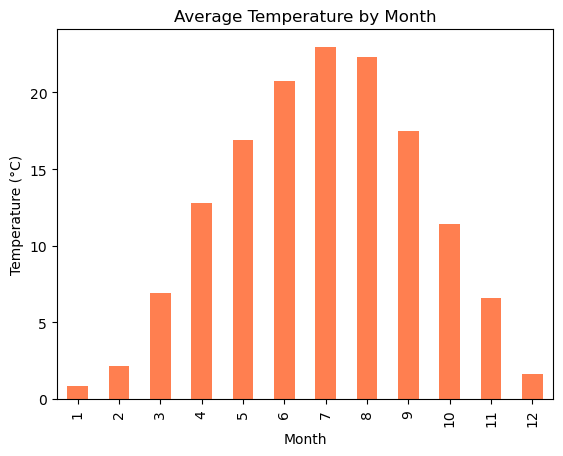

In [18]:
monthly_avg = df.groupby('Month')['Temperature'].mean()
monthly_avg.plot(kind='bar', color='coral')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

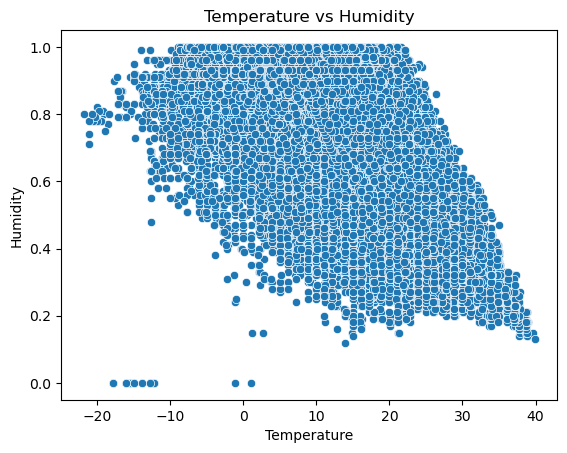

In [19]:
sns.scatterplot(x='Temperature', y='Humidity', data=df)
plt.title('Temperature vs Humidity')
plt.show()


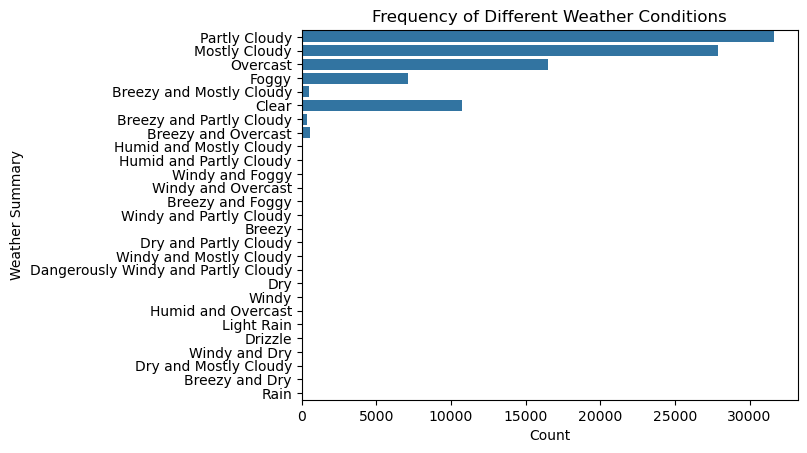

In [23]:
sns.countplot(y='Summary', data=df)
plt.title('Frequency of Different Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Summary')
plt.show()


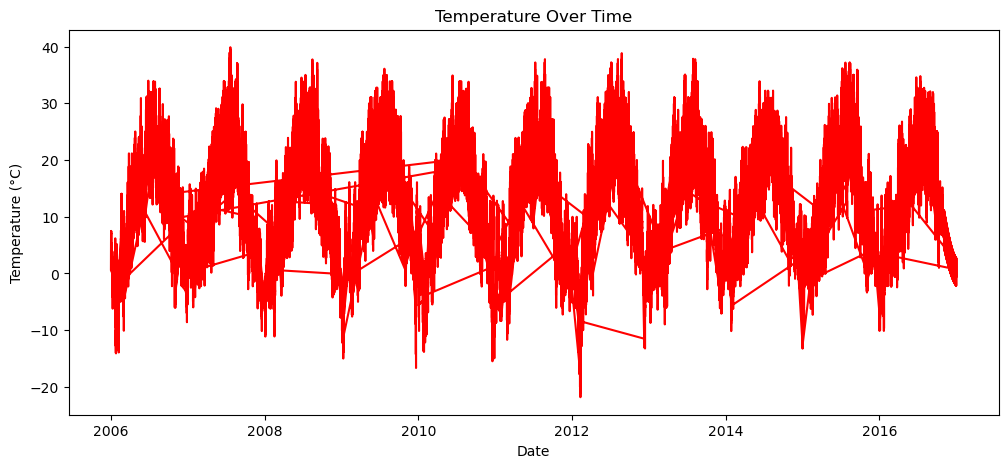

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Temperature'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()
